In [19]:
# Movie Rating Prediction - Final Code

# Install required library
!pip install joblib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load dataset with correct encoding
df = pd.read_csv(list(uploaded.keys())[0], encoding='latin1')

df.head()


Saving IMDb Movies India.csv to IMDb Movies India (4).csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
# Remove rows with missing values
df = df.dropna()

df.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [21]:
label = LabelEncoder()

categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_cols:
    df[col] = label.fit_transform(df[col].astype(str))


In [22]:
X = df[['Genre', 'Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Clean Year column: Remove brackets and convert to integer
df['Year'] = df['Year'].astype(str).str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove non-numeric characters from Duration
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)

df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float)

df = df.dropna()
df.isnull().sum()



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2049543224.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [32]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in X.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col].astype(str))


In [33]:
X = df[['Genre', 'Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X.dtypes


,0
Genre,int64
Year,int64
Duration,float64
Votes,float64
Director,int64
Actor 1,int64
Actor 2,int64
Actor 3,int64


In [35]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.267064943462897
R2 Score: 0.31574494876212633


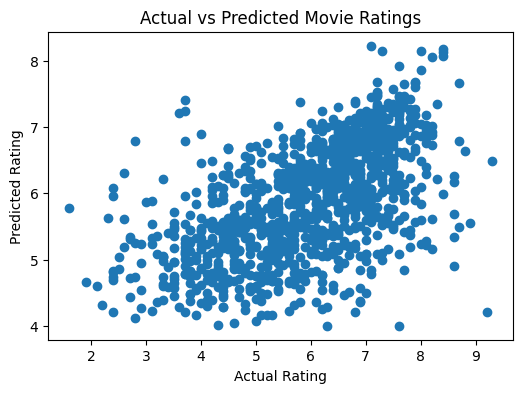

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()


In [38]:
joblib.dump(model, "movie_rating_model.pkl")


['movie_rating_model.pkl']